# Explore Labels

### 1. Read in Data

In [1]:
# Imports
import numpy as np
import pandas as pd

# Read Data
class_id_array = pd.read_csv('class_id_array.csv')
data = pd.read_csv('data.csv')
data = data.drop(columns=['track_id'])
print(class_id_array)
print(data)

        gender  track_id
0            0      1330
1            0      1330
2            0      1330
3            0      1330
4            0      1330
...        ...       ...
752822       1      9350
752823       1      9350
752824       1      9350
752825       1      9350
752826       1      9350

[752827 rows x 2 columns]
        speed  speed_max  mean_turning_angle  outreach_ratio  \
0    3.827775  15.422913            0.103121        0.136342   
1    5.366490  16.410934            0.159354        0.592727   
2    3.123633  28.774327            0.145173        0.083003   
3    1.663800  15.225459            0.303789        0.027139   
4    4.150165  17.482277            0.139008        0.056169   
..        ...        ...                 ...             ...   
486  2.902289  15.917160            0.169994        0.037422   
487  2.299978  17.452535            0.217142        0.100496   
488  1.544528  12.242734            0.294780        0.163349   
489  3.831001  18.345850         

In [2]:
# Add in Labels
print(class_id_array.tail())
averaged_class_id = class_id_array.groupby('track_id')['gender'].mean().round().astype(int).reset_index()
print(averaged_class_id)

        gender  track_id
752822       1      9350
752823       1      9350
752824       1      9350
752825       1      9350
752826       1      9350
     track_id  gender
0           6       0
1          14       0
2          17       0
3          18       1
4          31       1
..        ...     ...
486     25421       1
487     25448       1
488     25619       0
489     25927       1
490     27144       0

[491 rows x 2 columns]


In [3]:
# Create DF to Compare to Labels
combined_df = pd.concat([data, averaged_class_id], axis=1)
comparison_df = combined_df.drop(columns=['track_id'])
comparison_df = comparison_df.drop(columns=['mean_turning_angle'])
comparison_df = comparison_df.drop(columns=['speed_max'])
print(comparison_df)

        speed  outreach_ratio  mean_acceleration  min_acceleration  \
0    3.827775        0.136342           0.294142          0.002012   
1    5.366490        0.592727           0.395413          0.040245   
2    3.123633        0.083003           0.253220          0.000746   
3    1.663800        0.027139           0.179134          0.000613   
4    4.150165        0.056169           0.337333          0.003294   
..        ...             ...                ...               ...   
486  2.902289        0.037422           0.213074          0.002185   
487  2.299978        0.100496           0.233053          0.000316   
488  1.544528        0.163349           0.185482          0.001885   
489  3.831001        0.023873           0.297183          0.002737   
490  2.207359        0.071980           0.207192          0.003491   

     distance_traveled  gender  
0          3133.948689       0  
1          1364.319554       0  
2         13529.000365       0  
3         21258.660167     

In [4]:
# Tally Gender
tally = comparison_df['gender'].value_counts()
print(tally)

gender
0    256
1    235
Name: count, dtype: int64


### 2. Visualize

In [5]:
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

C:\Users\kaiwi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


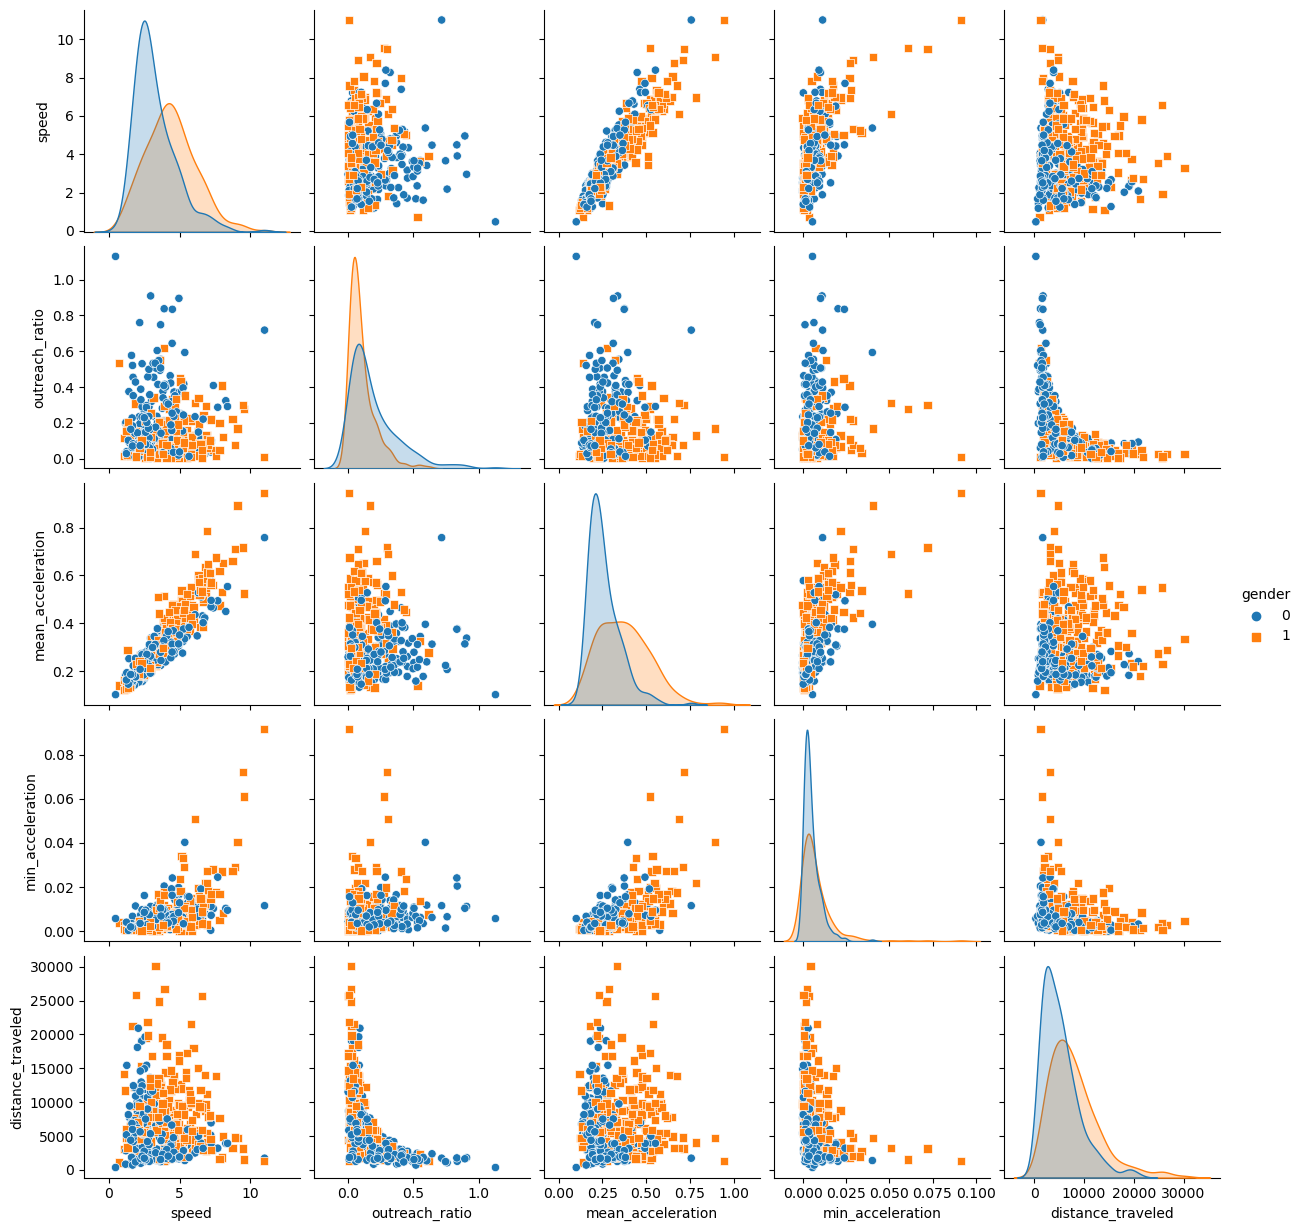

In [6]:
# Pair Plot
sns.pairplot(comparison_df, hue='gender', diag_kind='kde', markers=["o", "s"])
plt.show()

In [7]:
# Interactive 3D Plot
fig = go.Figure()

# Plot Labels
for label in comparison_df['gender'].unique():
    label_points = comparison_df.loc[comparison_df['gender'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_points['speed'],
        y=label_points['mean_acceleration'],
        z=label_points['distance_traveled'],
        mode='markers',
        marker=dict(size=5),
        name=f'Label {label}'
    ))

# Update Layout and Show Plot
fig.update_layout(scene=dict(xaxis_title='speed', 
                             yaxis_title='mean_acceleration', 
                             zaxis_title='distance_traveled'))
fig.show()

### 2. Simple Learner

In [8]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [9]:
# Split into X and y
X = comparison_df.drop('gender', axis=1)
y = comparison_df['gender']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (491, 5)
Shape of y: (491,)


In [10]:
# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build NN with TensorFlow/Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Test
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")



Epoch 1/50


11/11 - 1s - loss: 0.6707 - accuracy: 0.5938 - val_loss: 0.6382 - val_accuracy: 0.6750 - 642ms/epoch - 58ms/step
Epoch 2/50
11/11 - 0s - loss: 0.6254 - accuracy: 0.7273 - val_loss: 0.6006 - val_accuracy: 0.7750 - 27ms/epoch - 2ms/step
Epoch 3/50
11/11 - 0s - loss: 0.5966 - accuracy: 0.7386 - val_loss: 0.5734 - val_accuracy: 0.7750 - 27ms/epoch - 2ms/step
Epoch 4/50
11/11 - 0s - loss: 0.5772 - accuracy: 0.7330 - val_loss: 0.5592 - val_accuracy: 0.8000 - 27ms/epoch - 2ms/step
Epoch 5/50
11/11 - 0s - loss: 0.5624 - accuracy: 0.7358 - val_loss: 0.5472 - val_accuracy: 0.8000 - 26ms/epoch - 2ms/step
Epoch 6/50
11/11 - 0s - loss: 0.5503 - accuracy: 0.7358 - val_loss: 0.5404 - val_accuracy: 0.8000 - 26ms/epoch - 2ms/step
Epoch 7/50
11/11 - 0s - loss: 0.5419 - accuracy: 0.7358 - val_loss: 0.5418 - val_accuracy: 0.8000 - 27ms/epoch - 2ms/step
Epoch 8/50
11/11 - 0s - loss: 0.5338 - accuracy: 0.7415 - val_loss: 0.5383 - val_accuracy: 0.8000 - 27ms/epoch - 2ms/step
Epoch 9/50
11/11 -

In [11]:
# Use Sklearn MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), 
                               activation='relu', 
                               solver='adam', 
                               random_state=42)

# Train
mlp_classifier.fit(X_train_scaled, y_train)

# Test
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 78.79%


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 31  71 111 152 192 232 272 313]


[Parallel(n_jobs=-1)]: Done  20 out of  40 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished


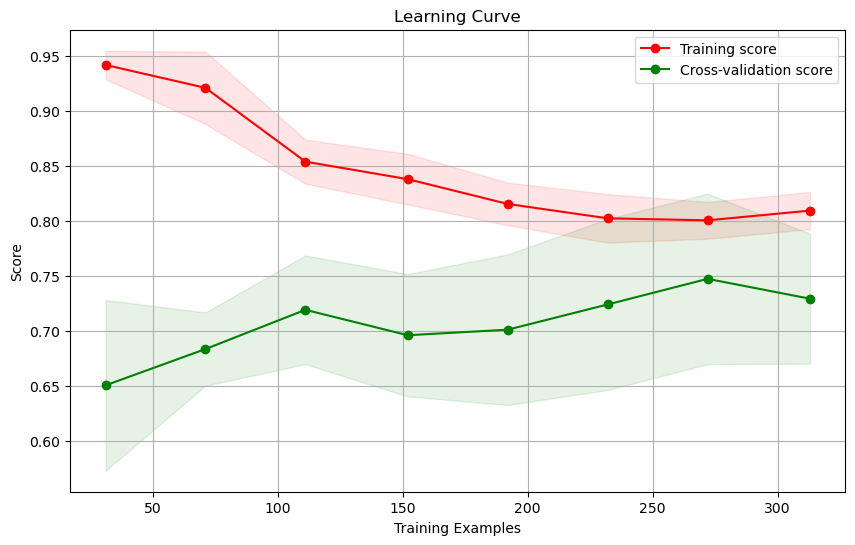

In [12]:
# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Calculate Learning Curve
train_sizes, train_scores, test_scores = \
    learning_curve(mlp_classifier, X_train_scaled, y_train, cv=5, n_jobs=-1,
                   train_sizes=np.linspace(.1, 1.0, 8), verbose=2)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### 3. Tuned Learner

In [13]:
# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [16]:
# Default Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), 
                               activation='relu', 
                               solver='adam', 
                               random_state=42)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier)
])

# Define Chosen Hyperparams
param_grid = {
    #'mlp__activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    #'mlp__solver': ['adam', 'lbfgs', 'sgd'],  # Solvers
    'mlp__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'mlp__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get Hyperparameters and Score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'mlp__alpha': 0.0001, 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 100}
Best Score: 0.7576111652061019


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [17]:
# Use Sklearn MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), 
                               activation='relu', 
                               solver='adam', 
                               random_state=42,
                               alpha=0.0001,
                               learning_rate_init=0.001,
                               max_iter=100)

# Train
mlp_classifier.fit(X_train_scaled, y_train)

# Test
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 80.81%


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [23]:
# MLP
mlp_classifier = MLPClassifier(activation='relu', 
                               solver='adam', 
                               random_state=42,
                               alpha=0.0001, 
                               learning_rate_init=0.001, 
                               max_iter=100)

# Network Architectures
param_grid = {
    'hidden_layer_sizes': [#(64,), 
                           #(32, 16),
                           (50, 25),
                           #(64, 32), 
                           #(100, 50)
                           #(128, 64),
                           #(256, 128)
                           #(64, 32, 16),
                        #(50,),  # Single layer with 50 neurons
                        #(25, 25),  # Two layers with 25 neurons each
                        #(75, 50),  # Two layers with 75 and 50 neurons
                        #(100,),  # Single layer with 100 neurons
                        #(150, 100),  # Two layers with 150 and 100 neurons
                        #(200,),  # Single layer with 200 neurons
                        #(200, 100),  # Two layers with 200 and 100 neurons
                        #(300,),  # Single layer with 300 neurons
                        #(400, 200)  # Two layers with 400 and 200 neurons
                          ]  
}

# Grid Search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train) 

# Best
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hidden Layer Sizes:", best_params['hidden_layer_sizes'])
print("Best Score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hidden Layer Sizes: (50, 25)
Best Score: 0.7576760791950665


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [22]:
# Use Sklearn MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), 
                               activation='relu', 
                               solver='adam', 
                               random_state=42,
                               alpha=0.0001,
                               learning_rate_init=0.001,
                               max_iter=100)

# Train
mlp_classifier.fit(X_train_scaled, y_train)

# Test
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 81.82%


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



### Non-Effective Searches Below

In [26]:
# Use Sklearn MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), 
                               random_state=42,
                               alpha=0.0001,
                               learning_rate_init=0.001,
                               max_iter=100)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier)
])

# Define Chosen Hyperparams
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'lbfgs', 'sgd'],  # Solvers
}

# Grid Search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train) 

# Get Hyperparameters and Score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'activation': 'relu', 'solver': 'adam'}
Best Score: 0.7576760791950665


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [31]:
# Define the MLPClassifier with default parameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', 
                               random_state=42, alpha=0.0001, learning_rate_init=0.001, max_iter=100)

# Define hyperparameter grid for grid search
param_grid = {
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate options
    'batch_size': [32, 64, 128],  # Batch size options
    'momentum': [0.9, 0.95, 0.99],  # Momentum options
    'early_stopping': [True, False],  # Early stopping options
    'validation_fraction': [0.1, 0.2],  # Validation fraction for early stopping
    'n_iter_no_change': [5, 10],  # Number of iterations with no improvement for early stopping
    'beta_1': [0.9, 0.95],  # Beta_1 for 'adam' solver
    'beta_2': [0.999, 0.9999],  # Beta_2 for 'adam' solver
    'shuffle': [True, False],  # Shuffle training data
    'verbose': [False]  # Verbose training output
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are defined

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Test the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Hyperparameters: {'batch_size': 128, 'beta_1': 0.95, 'beta_2': 0.9999, 'early_stopping': False, 'learning_rate': 'constant', 'momentum': 0.9, 'n_iter_no_change': 5, 'shuffle': False, 'validation_fraction': 0.1, 'verbose': False}
Best Score: 0.7576436222005842
Test Accuracy: 80.81%


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [30]:
# Use Sklearn MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', 
                               random_state=42, alpha=0.0001, learning_rate_init=0.001, max_iter=100,
                               batch_size=128, beta_1=0.95, beta_2=0.9999, early_stopping=False,
                               learning_rate='constant', momentum=0.9, n_iter_no_change=5,
                               shuffle=False, validation_fraction=0.1, verbose=False)

# Train
mlp_classifier.fit(X_train_scaled, y_train)

# Test
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 80.81%


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

